# Random Forest Project 

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import the Data

In [3]:
data = pd.read_csv('loan_data.csv')
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

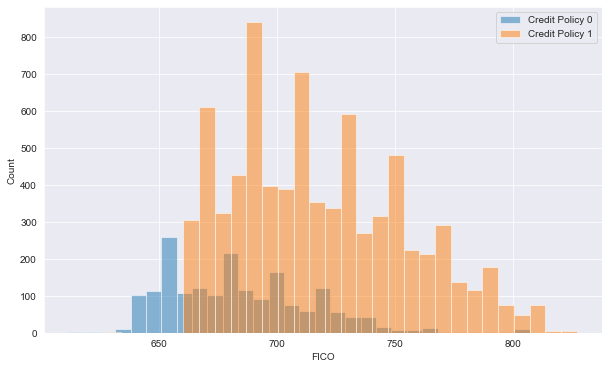

In [14]:
# FICO distribution for both Credit Policy 0, 1 
sns.set_style('dark')
sns.color_palette('pastel')

plt.figure(figsize = (10,6))
data[data['credit.policy']==0]['fico'].hist(alpha=0.5, bins = 30, label = 'Credit Policy 0')
data[data['credit.policy']==1]['fico'].hist(alpha = 0.5, bins = 30, label = 'Credit Policy 1')
plt.legend()
plt.xlabel('FICO')
plt.ylabel('Count');

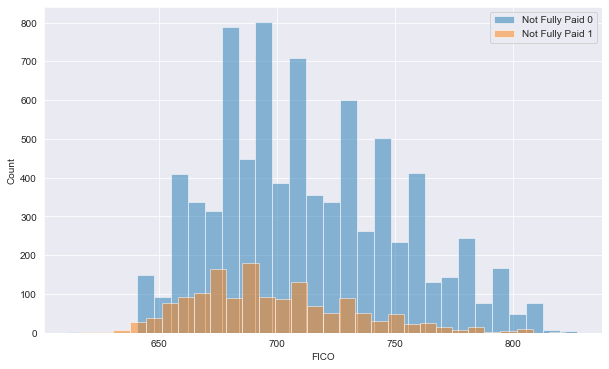

In [15]:
# FICO distribution for not fully paid 0 or 1
plt.figure(figsize = (10,6))
data[data['not.fully.paid']==0]['fico'].hist(alpha=0.5, bins = 30, label = 'Not Fully Paid 0')
data[data['not.fully.paid']==1]['fico'].hist(alpha = 0.5, bins = 30, label = 'Not Fully Paid 1')
plt.legend()
plt.xlabel('FICO')
plt.ylabel('Count');

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

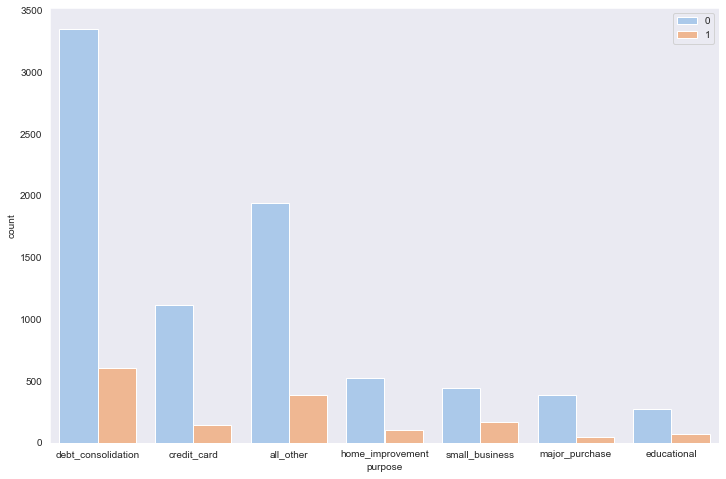

In [21]:
# Not Fully Paid and Purpose Distribution Bar plot
plt.figure(figsize = (12,8))
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = data, palette = 'pastel')
plt.legend();

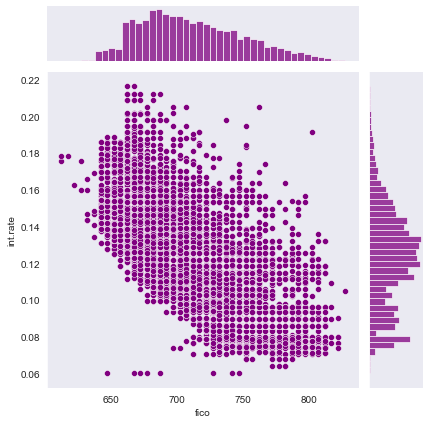

In [28]:
# Trend of FICO score and interest rate
sns.jointplot (x = 'fico', y = 'int.rate', data = data, color = 'purple');

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

<Figure size 1440x720 with 0 Axes>

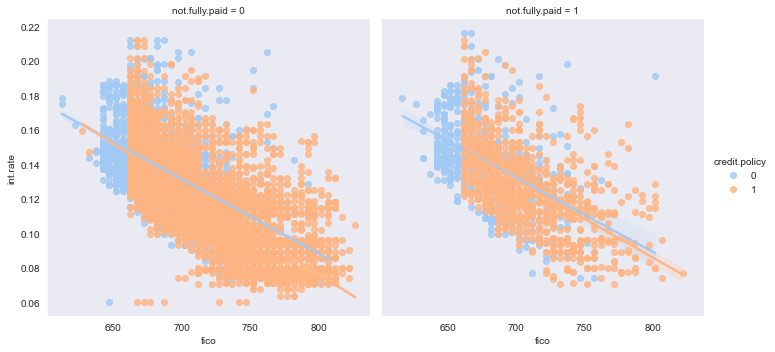

In [33]:
plt.figure(figsize = (20, 10));
sns.lmplot (x = 'fico', y = 'int.rate', hue = 'credit.policy', col = 'not.fully.paid',palette = 'pastel', data = data);

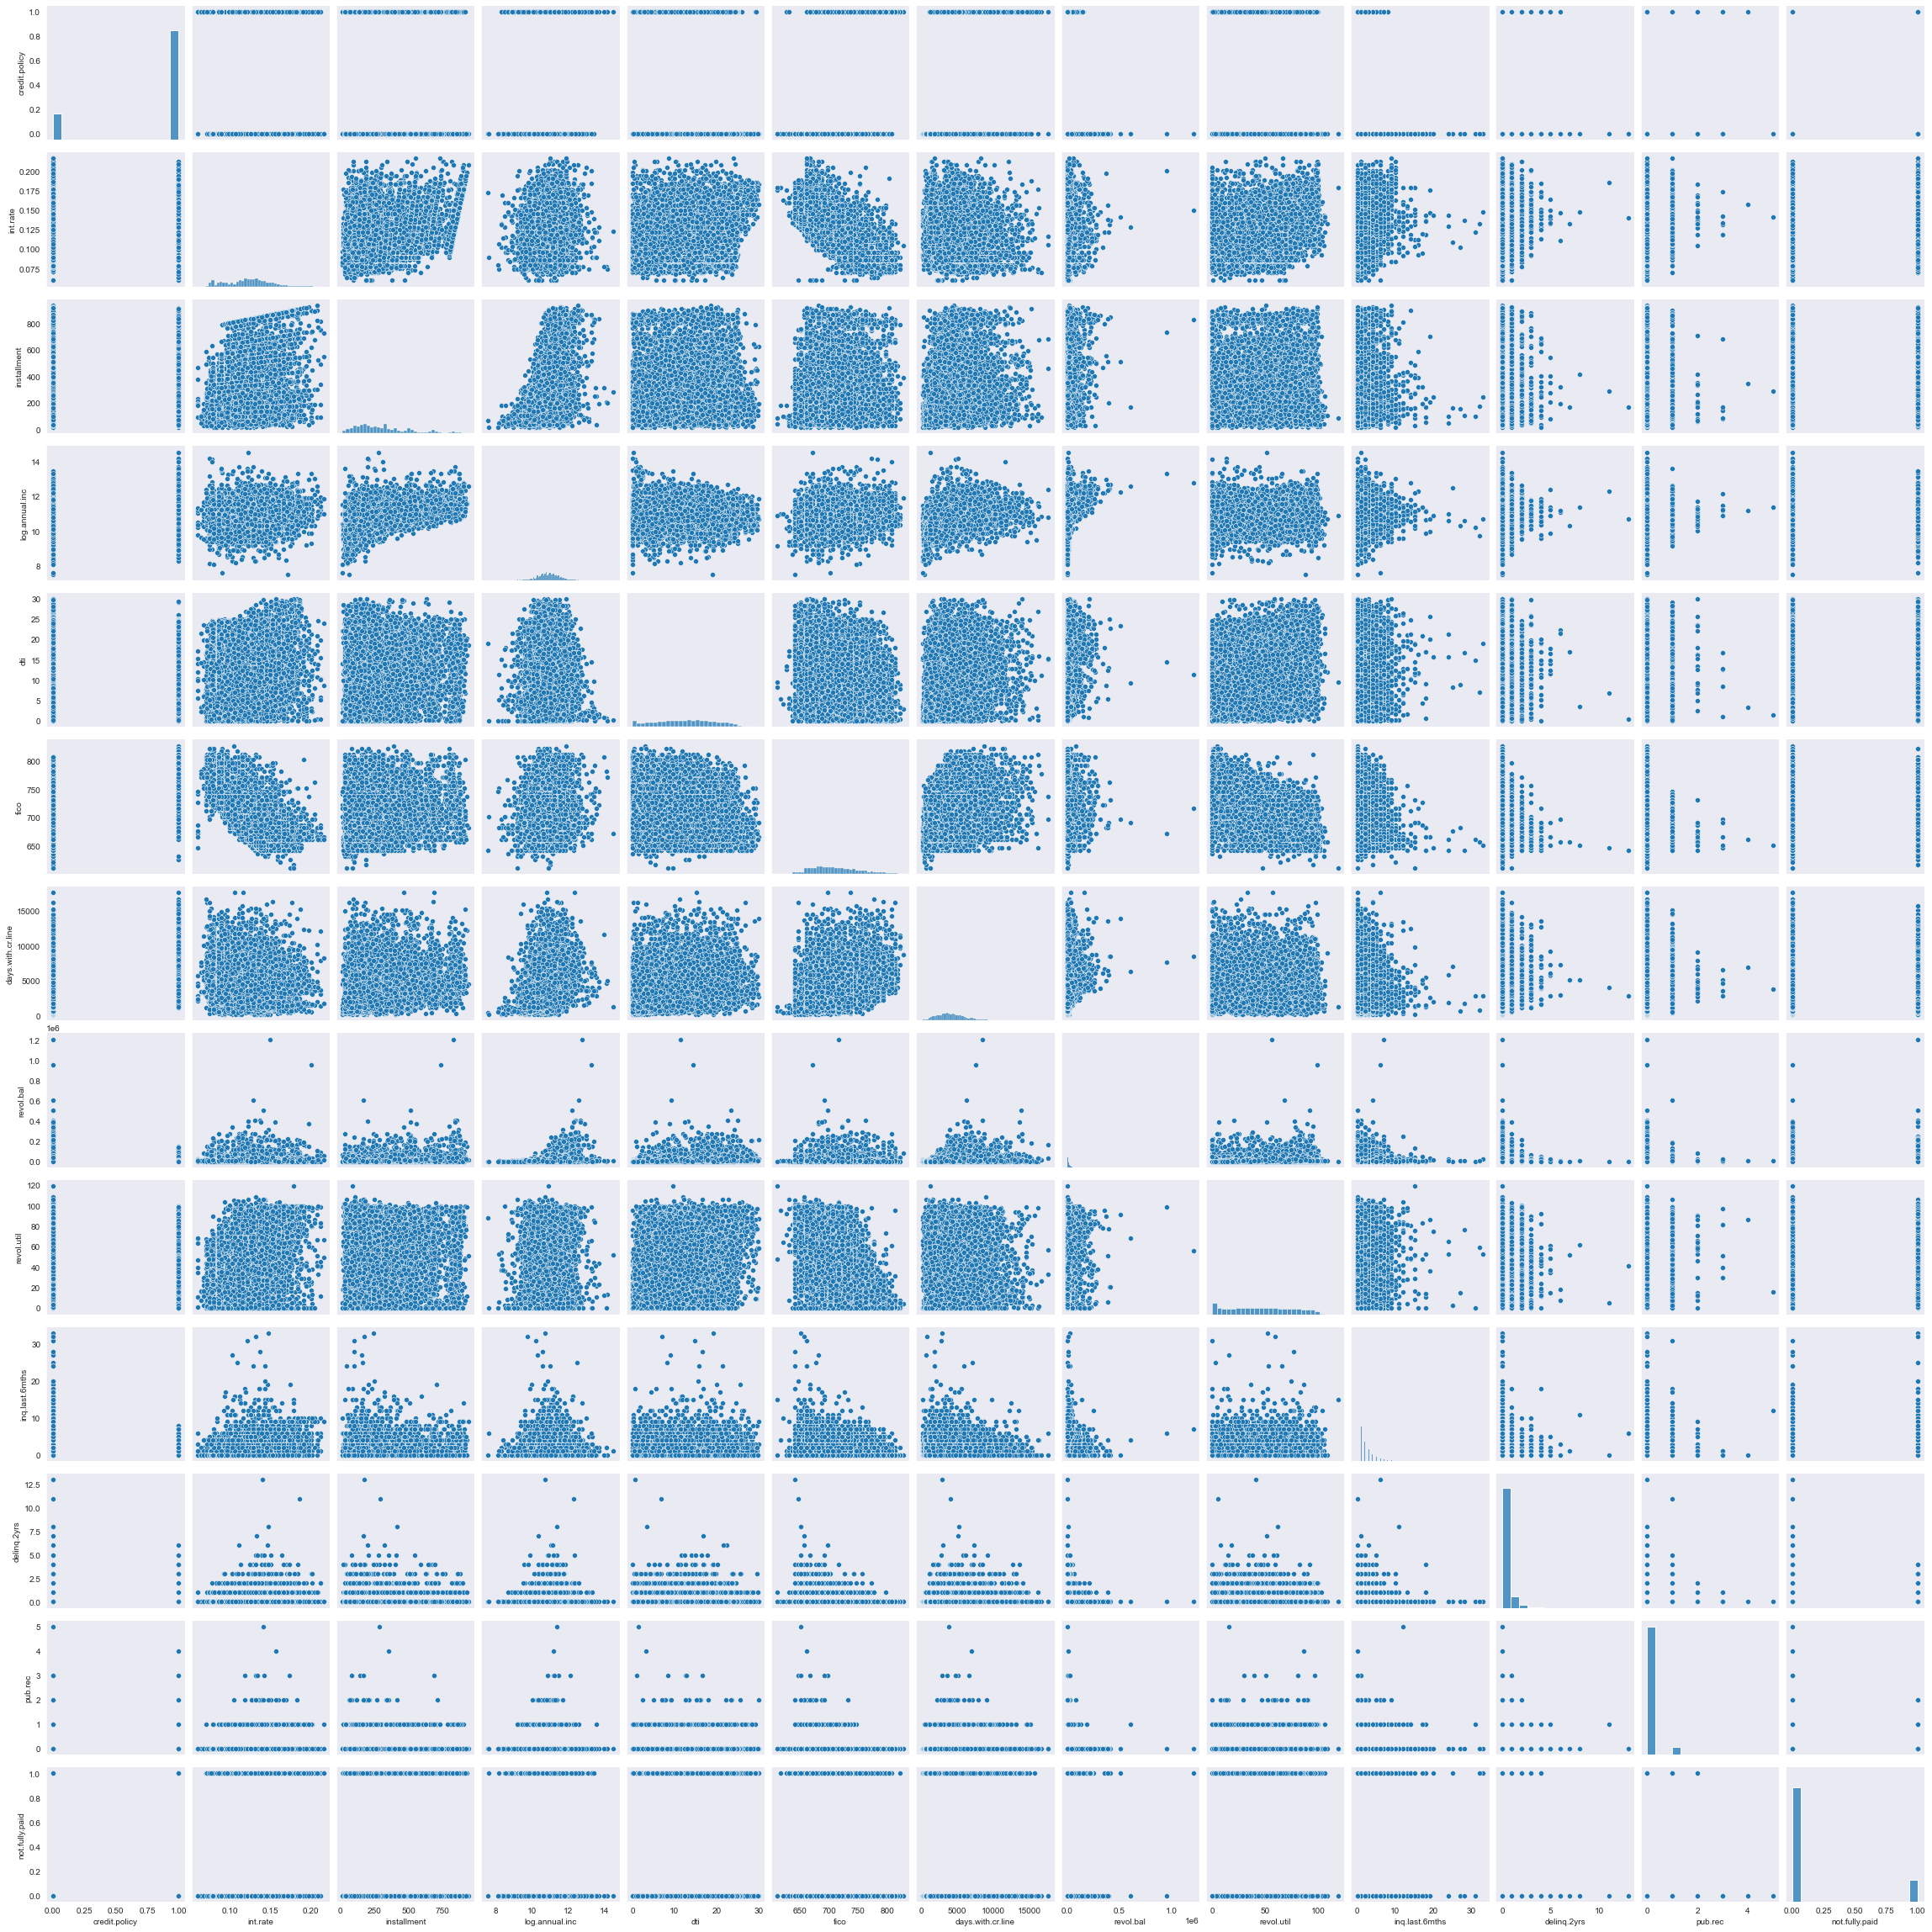

In [36]:
sns.pairplot(data);

# Setting up the Data for Random Forest Classification

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

drop categorical data

In [37]:
data.drop('purpose', axis = 1, inplace = True)
data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

In [40]:
x = data.drop('not.fully.paid',axis=1)
y = data['not.fully.paid']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## Training a Decision Tree Model

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dtree = DecisionTreeClassifier()

In [44]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree

In [45]:
predictions = dtree.predict(x_test)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2435
           1       0.20      0.23      0.22       439

    accuracy                           0.75      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.76      0.75      0.75      2874



In [49]:
print(confusion_matrix(y_test, predictions))

[[2046  389]
 [ 339  100]]


## Training the Random Forest model

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
RF = RandomForestClassifier (n_estimators = 600)

In [52]:
RF.fit(x_train, y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation

In [54]:
predictions_RF = RF.predict(x_test)

In [55]:
print(classification_report(y_test, predictions_RF))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2435
           1       0.33      0.02      0.04       439

    accuracy                           0.84      2874
   macro avg       0.59      0.51      0.48      2874
weighted avg       0.77      0.84      0.78      2874



In [57]:
print(confusion_matrix(y_test, predictions_RF))

[[2415   20]
 [ 429   10]]


In [58]:
# Finding the best n_estimators:

error_rate = []
for i in range (50,600,50):
    RF = RandomForestClassifier (n_estimators = i)
    RF.fit(x_train, y_train)
    predictions_i = RF.predict(x_test)
    error_rate.append(np.mean(predictions_i != y_test))

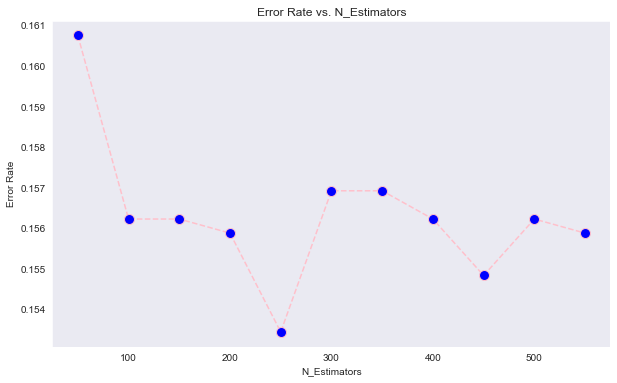

In [60]:
plt.figure(figsize=(10,6))
plt.plot(range(50,600,50),error_rate,color='pink', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. N_Estimators')
plt.xlabel('N_Estimators')
plt.ylabel('Error Rate');

## Retrain and Predict with new N_Estimator = 250

In [62]:
RF_new = RandomForestClassifier (n_estimators = 250)
RF_new.fit(x_train, y_train)
predictions_new = RF_new.predict(x_test)
print(classification_report(y_test, predictions_new))
print(confusion_matrix(y_test, predictions_new))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2435
           1       0.39      0.03      0.06       439

    accuracy                           0.84      2874
   macro avg       0.62      0.51      0.49      2874
weighted avg       0.78      0.84      0.78      2874

[[2415   20]
 [ 426   13]]
